In [9]:
import os
import csv

def convert_txt_file_to_csv(input_txt_path, output_dir, delimiter=','):
    """
    Reads a single .txt file from input_txt_path, converts it to .csv, and saves
    the new file inside output_dir with the same base name.

    :param input_txt_path: Full path to the input .txt file.
    :param output_dir: Directory where the .csv will be saved.
    :param delimiter: Delimiter used in the .txt file (default is comma).
    """

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Get the base filename (e.g., 'error_CL_1.txt' -> 'error_CL_1')
    base_name = os.path.basename(input_txt_path)
    file_root, _ = os.path.splitext(base_name)

    # Construct output CSV path with same base name
    output_csv_path = os.path.join(output_dir, file_root + '.csv')

    with open(input_txt_path, 'r') as txt_file, open(output_csv_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Read each line from the .txt, split by delimiter, and write to CSV
        for line in txt_file:
            row_data = line.strip().split(delimiter)
            csv_writer.writerow(row_data)

    print(f"Converted {input_txt_path} --> {output_csv_path}")


In [11]:
file_names = [
    "airfoil_cm_lists_with_trip",
    "airfoil_cm_lists",
    "efficiencies_alfa_1",
    "efficiencies_alfa_2",
    "efficiencies_alfa_with_trip",
    "efficiencies_CL_1",
    "efficiencies_CL_2",
    "efficiencies_CL_with_trip",
    "error_alfa_1",
    "error_alfa_2",
    "error_alfa_with_trip",
    "error_CL_1",
    "error_CL_2",
    "error_CL_with_trip",
    "error_cm_with_trip"
]

for file_name in file_names:
    convert_txt_file_to_csv(
        input_txt_path="results_txt/" + file_name + ".txt",
        output_dir="results_csv",
        delimiter=","
    )


Converted results_txt/airfoil_cm_lists_with_trip.txt --> results_csv/airfoil_cm_lists_with_trip.csv
Converted results_txt/airfoil_cm_lists.txt --> results_csv/airfoil_cm_lists.csv
Converted results_txt/efficiencies_alfa_1.txt --> results_csv/efficiencies_alfa_1.csv
Converted results_txt/efficiencies_alfa_2.txt --> results_csv/efficiencies_alfa_2.csv
Converted results_txt/efficiencies_alfa_with_trip.txt --> results_csv/efficiencies_alfa_with_trip.csv
Converted results_txt/efficiencies_CL_1.txt --> results_csv/efficiencies_CL_1.csv
Converted results_txt/efficiencies_CL_2.txt --> results_csv/efficiencies_CL_2.csv
Converted results_txt/efficiencies_CL_with_trip.txt --> results_csv/efficiencies_CL_with_trip.csv
Converted results_txt/error_alfa_1.txt --> results_csv/error_alfa_1.csv
Converted results_txt/error_alfa_2.txt --> results_csv/error_alfa_2.csv
Converted results_txt/error_alfa_with_trip.txt --> results_csv/error_alfa_with_trip.csv
Converted results_txt/error_CL_1.txt --> results_csv

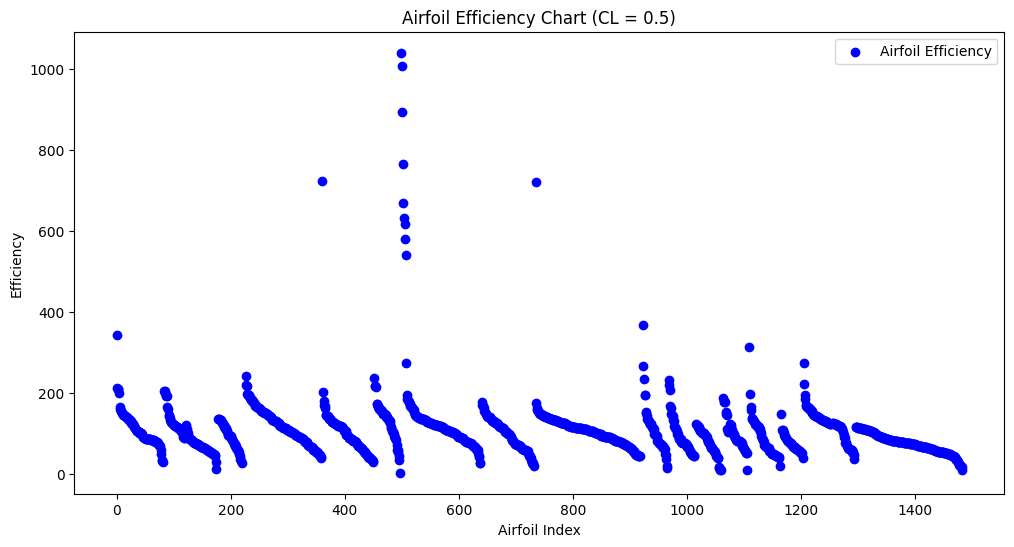

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the CSV
csv_file_path = "results_csv/efficiencies_alfa_1.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Ensure Airfoil_Index exists
df["Airfoil_Index"] = range(len(df))

# Plot without airfoil names
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df.iloc[:, 1], color='blue', label="Airfoil Efficiency")  # Using index for x-axis

# Formatting
plt.xlabel("Airfoil Index")  # No airfoil names
plt.ylabel("Efficiency")
plt.title("Airfoil Efficiency Chart (CL = 0.5)")
plt.legend()

# Show the chart
plt.show()
